# Tarea 8. Optimizacion
Guillermo Segura Gomez

## Ejercicio 1

Programar el método de BFGS modificado descrito en el Algoritmo 2 de la Clase 23.

1. Programe la función que implementa el algoritmo. Debe recibir como parámetros
- El punto inicial $\mathbf{x}_0$
- La matriz $\mathbf{H}_0$
- La función $f$
- El gradiente $\nabla f(\mathbf{x})$
- La tolerancia $\tau$
- El número máximo de iteraciones $N$
- Los paramétros $\rho, c_1, N_b$ del algoritmo de backtracking


In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Funcion de Backtracking
def Backtracking_DescSuf(alpha_0, rho, c1, xk, fk, gk, pk, nMax):

    for i in range(nMax):

        comp1 = fk(xk + alpha_0*pk)
        comp2 = fk(xk) + c1*alpha_0* np.dot(gk, pk)

        if (comp1 <= comp2):
            return alpha_0, i

        alpha_0 = alpha_0*rho

    return alpha_0, i

In [3]:
# Método de Broyden, FLetcher, Goldfarb y Shannon
def BFGS_mod(f, gradf, x0, tau, HessAprox, nMax, alpha_0, rho, c1, nBack):
    
    # Valores iniciales
    dim = len(x0)
    xk = np.array(x0)
    sequence = []

    # Inicializamos gk y Hk
    gk = gradf(xk)
    Hk = HessAprox(xk)
    
    for k in range(nMax):

        # Convergencia
        if np.linalg.norm(gk) < tau:
            return xk, k, gk, True, sequence

        # Calculamos la direccion pk = -Hk * gk
        pk = np.dot(-Hk, gk)

        # Condición de parada
        if pk @ gk > 0:
            
            # Calculamos lambda
            lambda1 = (10**-5) + (pk.T @ gk) / (gk.T @ gk)

            # Actualizamos Hk
            Hk = Hk + lambda1 * np.eye(dim)

            # Redefinimos p
            # pk = -lambda1 * gk
            pk = np.dot(-Hk, gk)

        # Calculamos el tamaño de paso
        alphak, _ = Backtracking_DescSuf(alpha_0, rho, c1, xk, f, gk, pk, nBack)

        # Calculamos los valores siguientes
        xk_next = xk + alphak * pk
        sk = xk_next - xk
        yk = gradf(xk_next) - gk

        # Calculamos Hk_next
        if (yk.T @ sk) <= 0:

            if np.dot(yk, yk) > 1e-10:  # Asegura que el denominador es suficientemente grande
                # Calculamos lambda
                lambda2 = 10**-5 - (yk.T @ sk) / (yk.T @ yk)
            else:
                lambda2 = 10**-5

            Hk_next = Hk + lambda2 * np.eye(dim)

        else:
            rhok = 1 / (yk.T @ sk) # Calculamos rho_k
            I = np.eye(dim)
            Hk_next = (I - rhok * np.outer(sk, yk)) @ Hk @ (I - rhok * np.outer(yk, sk)) + rhok * np.outer(sk, sk)

        # Actualizamos los valores
        xk = xk_next
        Hk = Hk_next
        gk = gradf(xk)

        # Almacenar puntos solo para visualización en 2D
        if len(x0) == 2:
            sequence.append(xk.tolist())

    return xk, nMax, gk, False, sequence

2. Pruebe el algoritmo para minimizar las siguientes funciones usando los parámetros
   $N=5000$, $\tau = \sqrt{n}\epsilon_m^{1/3}$, donde $n$ es la dimensión
   de la variable $\mathbf{x}$, $\mathbf{H}_0$ como la matriz identidad 
   y $\epsilon_m$ es el épsilon máquina. 
   Para backtracking use $\rho=0.5$, $c_1=0.001$ y el número máximo de iteraciones $N_b=500$.
   
   En cada caso imprima los siguientes datos:
   
- la dimensión $n$,
- $f(\mathbf{x}_0)$,
- el  número $k$ de iteraciones realizadas,
- $f(\mathbf{x}_k)$,
- las primeras y últimas 4 entradas del punto $\mathbf{x}_k$ que devuelve el algoritmo,
- la norma del vector gradiente $\mathbf{g}_k$, 
- la variable $res$ que indica si el algoritmo terminó porque se cumplió el
  criterio de la tolerancia o terminó por iteraciones.
  


**Función de cuadrática 1:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

- $f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}_1\mathbf{x} - \mathbf{b}_1^\top\mathbf{x}$,
  donde $\mathbf{A}_1$ y $\mathbf{b}_1$ están definidas por
  

$$ \mathbf{A}_1 = n\mathbf{I} + \mathbf{1} = 
\left[\begin{array}{llll} n      & 0      & \cdots & 0 \\
                       0      & n      & \cdots & 0 \\ 
                       \vdots & \vdots & \ddots & \vdots \\
                       0      & 0      & \cdots & n \end{array}\right]
+ \left[\begin{array}{llll} 1    & 1      & \cdots & 1 \\
                       1      & 1      & \cdots & 1 \\ 
                       \vdots & \vdots & \ddots & \vdots \\
                       1      & 1      & \cdots & 1 \end{array}\right],  \qquad
\mathbf{b}_1 = \left[\begin{array}{l} 1 \\ 1 \\ \vdots \\ 1 \end{array}\right], $$

donde $\mathbf{I}$ es la matriz identidad y $\mathbf{1}$ es la matriz llena de 1's,
ambas de tamaño $n$, usando los puntos iniciales   
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{10}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{100}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{1000}$ 

---

**Función de cuadrática 2:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

- $f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}_2\mathbf{x} - \mathbf{b}_2^\top\mathbf{x}$,
  donde $\mathbf{A}_2= [a_{ij}]$ y $\mathbf{b}_2$ están definidas por
  
$$ a_{ij} = exp\left(-0.25(i-j)^2 \right),  \qquad
\mathbf{b}_2 = \left[\begin{array}{l} 1 \\ 1 \\ \vdots \\ 1 \end{array}\right] $$

usando los puntos iniciales:
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{10}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{100}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{1000}$ 

---

**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
- $\mathbf{x}_0 = (2,3)$  
   
---

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
- $\mathbf{x}_0 = (2,4)$

---

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{40}$ 


In [4]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_himmelblau(x):
    df_dx1 = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    df_dx2 = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
    return np.array([df_dx1, df_dx2])

In [5]:
def beale(x):
    return ((1.5 - x[0] + x[0]*x[1])**2 + 
            (2.25 - x[0] + x[0]*x[1]**2)**2 + 
            (2.625 - x[0] + x[0]*x[1]**3)**2)

def grad_beale(x):
    x1, x2 = x
    df_dx1 = 2*(1.5 - x1 + x1*x2)*(-1 + x2) + 2*(2.25 - x1 + x1*x2**2)*(-1 + x2**2) + 2*(2.625 - x1 + x1*x2**3)*(-1 + x2**3)
    df_dx2 = 2*(1.5 - x1 + x1*x2)*x1 + 2*(2.25 - x1 + x1*x2**2)*2*x1*x2 + 2*(2.625 - x1 + x1*x2**3)*3*x1*x2**2
    return np.array([df_dx1, df_dx2])

In [6]:
def rosenbrock(x):
    return sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def grad_rosenbrock(x):
    df_dx = np.zeros_like(x)
    n = len(x)
    df_dx[:-1] += -400 * x[:-1] * (x[1:] - x[:-1]**2) + 2 * (x[:-1] - 1)  # Derivadas parciales para x_i donde i < n
    df_dx[1:] += 200 * (x[1:] - x[:-1]**2)  # Derivadas parciales para x_{i+1} donde i < n
    return df_dx

In [7]:
# Función para visualizar los contornos de nivel de función en 2D
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, secuencia=None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = np.array([[fncf(np.array([x, y])) for x in ax] for y in ay])

    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='viridis')
    plt.colorbar(CS, ax=ax)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Graficar la secuencia de puntos
    if secuencia is not None:
        secuencia = np.array(secuencia)
        ax.plot(secuencia[:, 0], secuencia[:, 1], 'r.-')  # 'r.-' para puntos rojos conectados por líneas
        ax.plot(secuencia[0, 0], secuencia[0, 1], 'go')  # Punto de inicio en verde
        ax.plot(secuencia[-1, 0], secuencia[-1, 1], 'bo')  # Punto final en azul

    plt.show()

Probamos las funciones cuadraticas

In [8]:
# Función para generar A1 y b1
def generate_A1_b1(n):
    A1 = n * np.eye(n) + np.ones((n, n))
    b1 = np.ones(n)
    return A1, b1

# Función para generar A2 y b2
def generate_A2_b2(n):
    A2 = np.array([[np.exp(-0.25 * (i - j) ** 2) for j in range(n)] for i in range(n)])
    b2 = np.ones(n)
    return A2, b2

In [9]:
def fG(x, A, b):
    return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x)

def gradfG(x, A, b):
    return np.dot(A, x) - b

In [10]:
# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

# Configuración de tolerancia
tau = lambda n: np.sqrt(n) * epsilon_m**(1/3)

# Parámetros iniciales
alpha_0 = 1
rho = 0.5
c1 = 0.001

# Número máximo de iteraciones para el descenso máximo y la sección dorada
NMax = 5000
NBack = 500

# Función para probar el algoritmo de newton con diferentes funciones
def probar_algoritmo(func, grad_func, hess_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, k, gk, convergio, secuencia = BFGS_mod(func, grad_func, x0, tau(len(x0)), hess_func, NMax, alpha_0, rho, c1, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}, f(x0) = {func(x0)}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Definimos la hessiana como la matriz identidad
def HessfG(x, A, b):
    return np.eye(len(x))


# Función para probar las funciones cuadráticas
def test_quadratic(n, generate):

    # Puntos iniciales
    x0 = [np.zeros(n)]

    # Generar A, b
    A, b = generate(n)

    # Generamos la función y su gradiente 
    f = lambda x: fG(x, A, b)
    gradf = lambda x: gradfG(x, A, b)
    hessf = lambda x: HessfG(x, A, b)
    
    probar_algoritmo(f, gradf, hessf, x0)

In [11]:
# Prueba del algoritmo para f1
for n in [10, 100, 1000]:
    test_quadratic(n, generate_A1_b1)

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], f(x0) = 0.0:
xk = [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05], k = 2, f(xk) = -0.25, convergió: True

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.], f(x0) = 0.0:
xk = [0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [12]:
# Prueba del algoritmo para f2
for n in [10, 100, 1000]:
    test_quadratic(n, generate_A2_b2)

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], f(x0) = 0.0:
xk = [ 1.36910165 -1.16637731  1.60908339 -0.61339229  0.59500721  0.59500721
 -0.61339229  1.60908339 -1.16637731  1.36910165], k = 18, f(xk) = -1.7934208025210774, convergió: True

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.], f(x0) = 0.0:
xk = [ 1.44628123 -1.41633442  2.11047122 -1.42499584  1.75922764 -0.94218914
  1.27161336 -0.50579374  0.90377927 -0.20568947  0.6634142  -0.01520447
  0.5133468   0.10266653  0.42086291  0.17526727  0.36377549  0.22028886
  0.32812059  0.24866329  0.30541531  0.2669251   0.29068462  0.278796
  0.28120576  0.2861968   0.27567114  0.28999556  0.27351311  0.29060975
  0.27432959  0.28853122  0.2774374   0.284

Probamos las otras funciones

Función de Himmelblau:
Resultado para x0 = [2. 4.], f(x0) = 130.0:
xk = [ 3.58442834 -1.84812653], k = 10, f(xk) = 9.834452856641356e-16, convergió: True


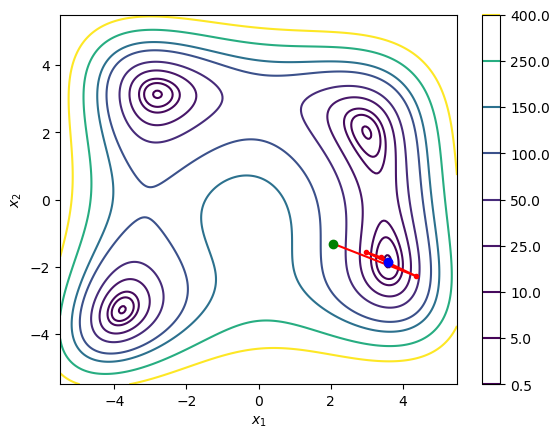


Función de Beale:
Resultado para x0 = [0. 0.], f(x0) = 14.203125:
xk = [3.0000002  0.50000006], k = 18, f(xk) = 8.665292270724936e-15, convergió: True


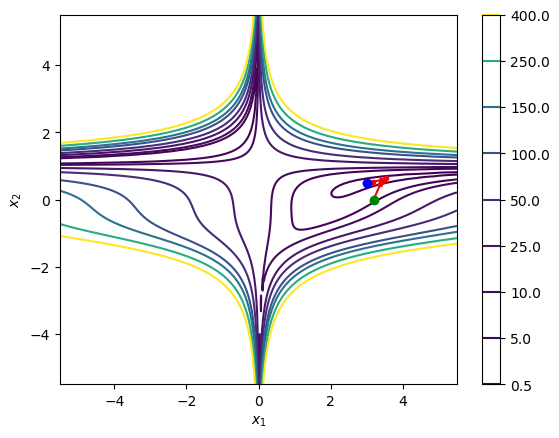


Resultado para x0 = [2. 3.], f(x0) = 3347.203125:
xk = [-4.57030483e+06  1.00000022e+00], k = 5000, f(xk) = 0.45200926135300823, convergió: False


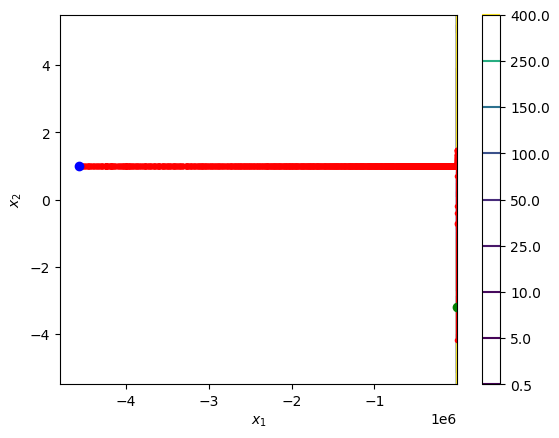


Función de Rosenbrock:
Resultado para x0 = [-1.2  1. ], f(x0) = 24.199999999999996:
xk = [1.         0.99999999], k = 34, f(xk) = 2.745636868826416e-17, convergió: True


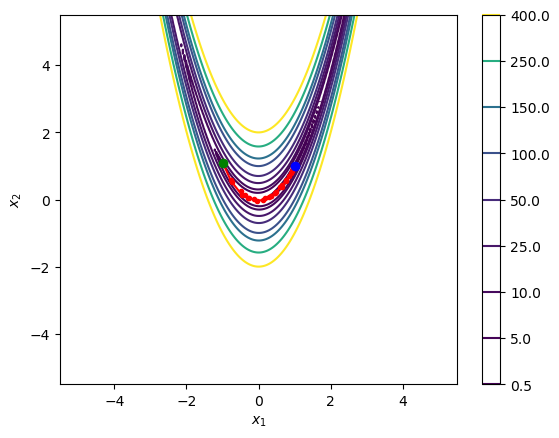


Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ], f(x0) = 4597.999999999999:
xk = [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99999999 0.99999998
 0.99999998 0.99999995], k = 129, f(xk) = 1.808629645082156e-14, convergió: True

Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ], f(x0) = 12221.000000000004:
xk = [1.         1.         1.         1.         0.99999999 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1

In [13]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_himmelblau = [np.array([2.0, 4.0])]

# Puntos iniciales para la función de Beale
puntos_iniciales_beale = [np.array([0.0, 0.0]), np.array([2.0, 3.0])]

# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-1.2, 1.0]),
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(20)]),
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(50)])
]

# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

# Configuración de tolerancia
tau = lambda n: np.sqrt(n) * epsilon_m**(1/3)

# Parámetros iniciales
alpha_0 = 1
rho = 0.5
c1 = 0.001

# Número máximo de iteraciones para el descenso máximo y la sección dorada
NMax = 5000
NBack = 500

# Función para probar el algoritmo de newton con diferentes funciones
def probar_algoritmo(func, grad_func, hess_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, k, gk, convergio, secuencia = BFGS_mod(func, grad_func, x0, tau(len(x0)), hess_func, NMax, alpha_0, rho, c1, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}, f(x0) = {func(x0)}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probamos como hessiana la funcion identidad
def hessian_identidad(x):
    return np.eye(len(x))

# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_algoritmo(himmelblau, grad_himmelblau, hessian_identidad, puntos_iniciales_himmelblau)

# Probar con la función de BealeNewtonTruncado(func, grad_func, hess_func, x0, tau(len(x0)), NMax, alpha_0, rho, c1, NBack)
print("Función de Beale:")
probar_algoritmo(beale, grad_beale, hessian_identidad, puntos_iniciales_beale)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_algoritmo(rosenbrock, grad_rosenbrock, hessian_identidad, puntos_iniciales_rosenbrock)

**Discusion** 

El método BFGS modificado convergio en general para todas las funciones, solo tuvo problemas con la función de Beale desde el punto inicial [2.0, 3.0], en donde el metodo no convergio. Agregue el punto inicial [0.0, 0.0] y el algoritmo convergio. Este comportamiento puede atribuirse a la sensibilidad del método a la aproximación inicial de la matriz Hessiana inversa ($\boldsymbol{H}_0$), crucial para su rendimiento. Dado que la función de Beale presenta valles estrechos y curvaturas complicadas, un punto inicial inadecuado puede llevar a una mala estimación de $\boldsymbol{H}_0$, afectando la dirección de búsqueda y la convergencia. Esto nos lleva a considerar la importancia de una elección cuidadosa del punto inicial y de $\boldsymbol{H}_0$ en métodos cuasi-Newton, especialmente en funciones con complejidades topológicas significativas. 